# Spotify Project

In [1]:
import config
import spotipy
import json
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# Connecting API
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

## Creating a Clustering Model

In [3]:
# Bringing the spotify list of songs and dropping the previous index and the id columns
df = pd.read_csv('spotify_songs_list.csv')
df = df.drop("Unnamed: 0", axis = 1)
af_df = df.drop("id", axis = 1)
af_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.542,0.905,-5.653,0.0540,0.001720,0.010400,0.136,0.3740,153.398,203347
1,0.643,0.849,-5.428,0.0526,0.037100,0.000000,0.058,0.9030,162.152,165853
2,0.579,0.558,-6.986,0.0895,0.020200,0.000001,0.212,0.5060,179.949,207357
3,0.489,0.649,-5.110,0.0336,0.000603,0.713000,0.101,0.7700,158.009,219827
4,0.426,0.888,-3.720,0.0987,0.000455,0.000000,0.306,0.3870,144.111,191520
...,...,...,...,...,...,...,...,...,...,...
2942,0.744,0.141,-19.627,0.0603,0.469000,0.863000,0.111,0.3700,112.294,148071
2943,0.792,0.342,-12.032,0.0329,0.088600,0.822000,0.128,0.3340,110.016,161591
2944,0.661,0.209,-19.632,0.0398,0.434000,0.892000,0.131,0.2680,110.000,179591
2945,0.560,0.359,-14.593,0.0288,0.061700,0.858000,0.151,0.0376,100.021,201750


In [4]:
af_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.590611,0.594908,-10.151845,0.073565,0.341628,0.240603,0.166113,0.538377,123.467584,210223.309467
std,0.165309,0.281575,7.122500,0.072371,0.354998,0.374545,0.129826,0.272496,30.267530,70955.454609
min,0.075500,0.003940,-35.824000,0.022700,0.000003,0.000000,0.017800,0.033400,49.081000,63000.000000
25%,0.473500,0.423000,-11.781500,0.037100,0.020400,0.000004,0.092800,0.312000,100.129500,162443.500000
50%,0.606000,0.647000,-7.781000,0.047700,0.185000,0.001010,0.113000,0.525000,120.030000,197707.000000
75%,0.720500,0.827500,-5.481000,0.076100,0.646500,0.560000,0.196500,0.777000,143.010500,242320.000000
max,0.983000,0.995000,1.358000,0.869000,0.996000,0.982000,0.982000,0.992000,216.016000,656934.000000


#### Scaling the df

In [5]:
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(af_df)
af_df_scaled = scaler.transform(af_df)
af_df_scaled = pd.DataFrame(af_df_scaled, columns = af_df.columns)
display(af_df.head())
print()
display(af_df_scaled.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.542,0.905,-5.653,0.0540,0.001720,0.010400,0.136,0.374,153.398,203347
1,0.643,0.849,-5.428,0.0526,0.037100,0.000000,0.058,0.903,162.152,165853
2,0.579,0.558,-6.986,0.0895,0.020200,0.000001,0.212,0.506,179.949,207357
3,0.489,0.649,-5.110,0.0336,0.000603,0.713000,0.101,0.770,158.009,219827
4,0.426,0.888,-3.720,0.0987,0.000455,0.000000,0.306,0.387,144.111,191520


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.294109,1.101463,0.631746,-0.270394,-0.957655,-0.614724,-0.231985,-0.603329,0.989030,-0.096927
1,0.316971,0.902549,0.663341,-0.289741,-0.857975,-0.642495,-0.832893,1.338312,1.278300,-0.625432
2,-0.070248,-0.131098,0.444561,0.220215,-0.905589,-0.642492,0.353514,-0.118837,1.866390,-0.040403
3,-0.614775,0.192139,0.707996,-0.552321,-0.960802,1.261469,-0.501623,0.850149,1.141397,0.135371
4,-0.995944,1.041079,0.903185,0.347359,-0.961219,-0.642495,1.077684,-0.555614,0.682147,-0.263637


In [6]:
# Now all the features has the same weight
af_df_scaled.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03
mean,-3.760518e-16,-9.282625e-16,2.278839e-16,-9.945669e-17,-4.133669e-16,-2.746587e-15,1.203652e-17,-2.905365e-16,4.324859e-17,1.586033e-16
std,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00
min,-3.116574e+00,-2.099147e+00,-3.604986e+00,-7.029585e-01,-9.624924e-01,-6.424954e-01,-1.142591e+00,-1.853467e+00,-2.458053e+00,-2.075222e+00
25%,-7.085543e-01,-6.106246e-01,-2.288426e-01,-5.039510e-01,-9.050257e-01,-6.424845e-01,-5.647955e-01,-8.308941e-01,-7.711909e-01,-6.734918e-01
50%,9.311035e-02,1.850345e-01,3.329235e-01,-3.574593e-01,-4.412827e-01,-6.397983e-01,-4.091759e-01,-4.909915e-02,-1.135926e-01,-1.764267e-01
75%,7.858697e-01,8.261795e-01,6.558987e-01,3.502778e-02,8.589444e-01,8.529041e-01,2.341030e-01,8.758414e-01,6.457822e-01,4.524266e-01
max,2.374073e+00,1.421148e+00,1.616258e+00,1.099288e+01,1.843623e+00,1.979794e+00,6.285548e+00,1.664977e+00,3.058199e+00,6.296718e+00


### Chosing K

##### Elbow Method

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

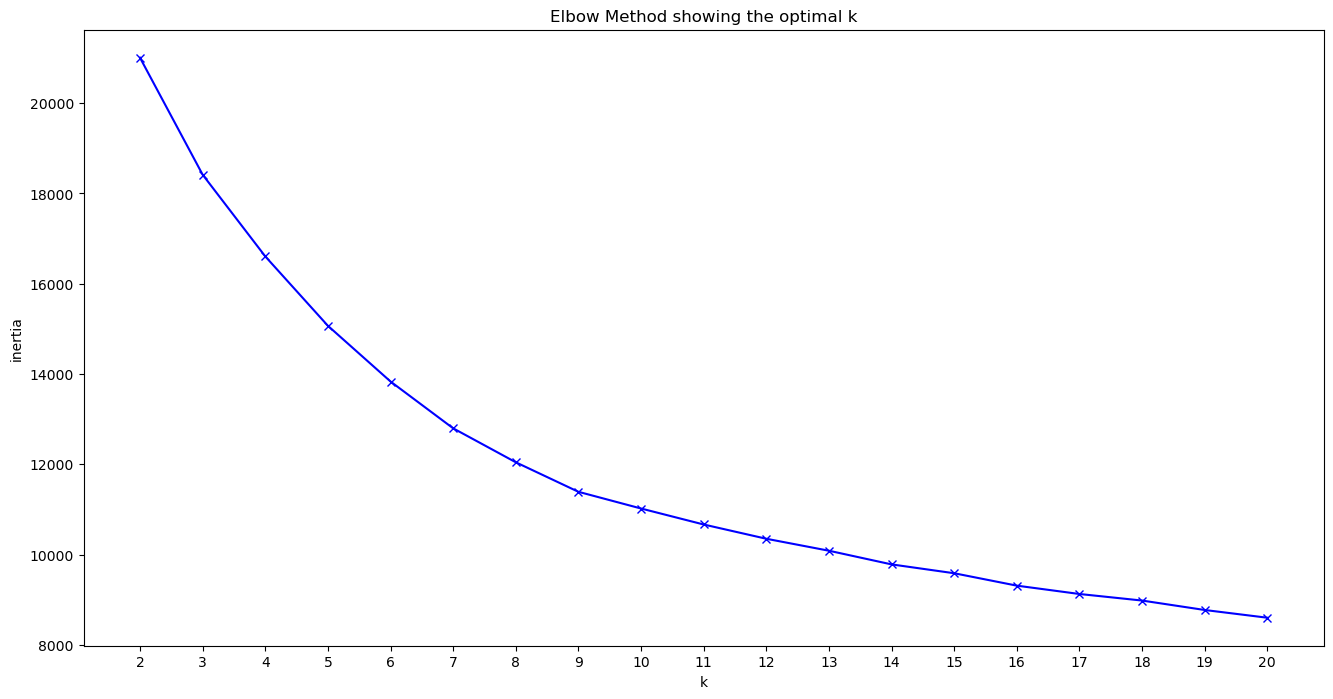

In [7]:
from sklearn.cluster import KMeans
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1000)
    kmeans.fit(af_df_scaled)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There appears to be an elbow at K=6

#### Silouhette Method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

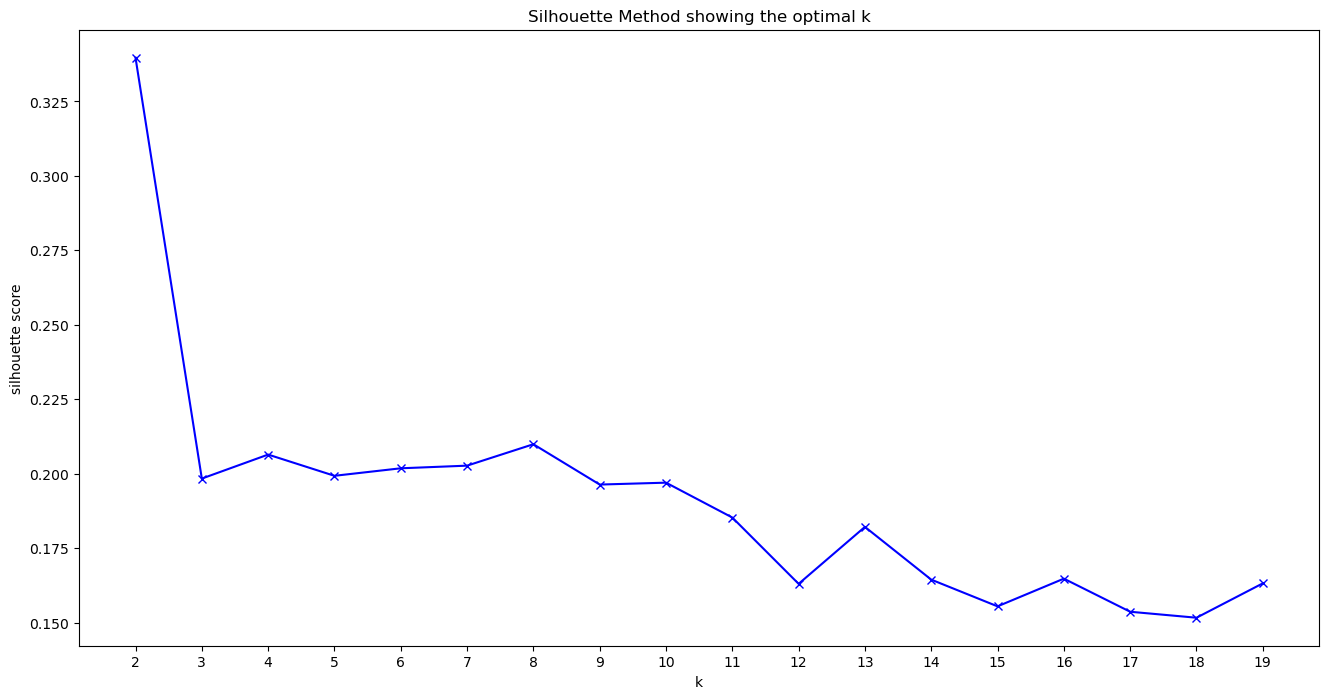

In [8]:
import pickle
from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1000)
    kmeans.fit(af_df_scaled)
    
    filename = "Model/kmeans_" + str(k) + ".pickle" # saving the model in a pickle file
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(af_df_scaled, kmeans.predict(af_df_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

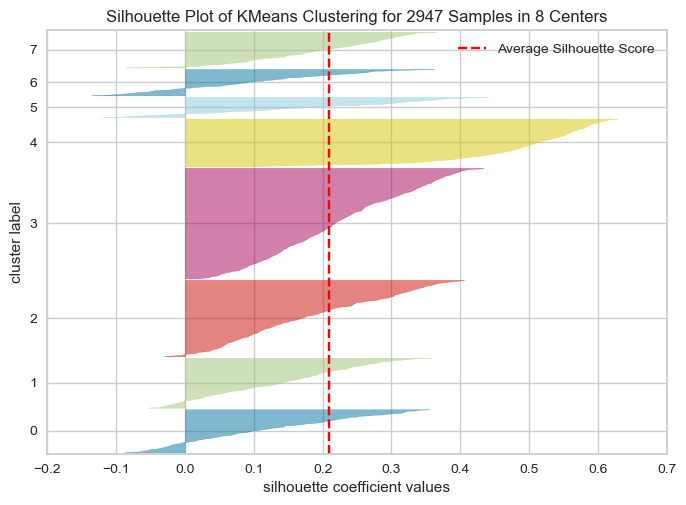

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2947 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [9]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(8, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(af_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

8 Clusters might be the best one

#### Clustering the songs with K-Means

In [10]:
# Based on the previous results from the Silouhette Method, I believe there should be around 8 different genres
kmeans = KMeans(n_clusters=8, random_state=1000)
kmeans.fit(af_df_scaled)

KMeans(random_state=1000)

In [11]:
labels = kmeans.labels_

In [12]:
import numpy as np
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

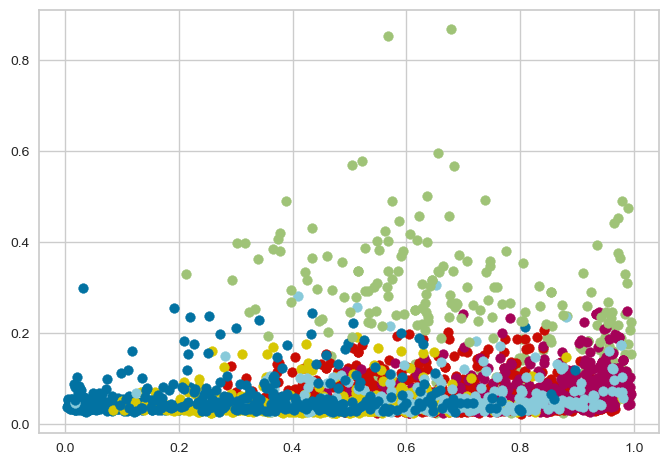

In [13]:
from matplotlib import pyplot
# assign a cluster to each example
km_labels = kmeans.predict(af_df_scaled)
# retrieve unique clusters
clusters = np.unique(km_labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(km_labels == cluster)
    # create scatter of these samples
    pyplot.scatter(af_df.to_numpy()[row_ix, 1], af_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [14]:
#Finding how many tracks are in each cluster
clusters = kmeans.predict(af_df_scaled)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    344
1    303
2    796
3    519
4    364
5    220
6    260
7    141
dtype: int64

In [15]:
# Adding the cluster column
af_df["cluster"] = clusters
af_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.542,0.905,-5.653,0.0540,0.001720,0.010400,0.136,0.3740,153.398,203347,3
1,0.643,0.849,-5.428,0.0526,0.037100,0.000000,0.058,0.9030,162.152,165853,3
2,0.579,0.558,-6.986,0.0895,0.020200,0.000001,0.212,0.5060,179.949,207357,3
3,0.489,0.649,-5.110,0.0336,0.000603,0.713000,0.101,0.7700,158.009,219827,3
4,0.426,0.888,-3.720,0.0987,0.000455,0.000000,0.306,0.3870,144.111,191520,3
...,...,...,...,...,...,...,...,...,...,...,...
2942,0.744,0.141,-19.627,0.0603,0.469000,0.863000,0.111,0.3700,112.294,148071,6
2943,0.792,0.342,-12.032,0.0329,0.088600,0.822000,0.128,0.3340,110.016,161591,6
2944,0.661,0.209,-19.632,0.0398,0.434000,0.892000,0.131,0.2680,110.000,179591,6
2945,0.560,0.359,-14.593,0.0288,0.061700,0.858000,0.151,0.0376,100.021,201750,6


In [16]:
# Adding back the id column
df_clustered = pd.concat([df , af_df["cluster"]], axis = 1)
df_clustered

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.542,0.905,-5.653,0.0540,0.001720,0.010400,0.136,0.3740,153.398,5A1FmxbYVRZKy4nc16MAue,203347,3
1,0.643,0.849,-5.428,0.0526,0.037100,0.000000,0.058,0.9030,162.152,6GG73Jik4jUlQCkKg9JuGO,165853,3
2,0.579,0.558,-6.986,0.0895,0.020200,0.000001,0.212,0.5060,179.949,7nzsY8vlnKdvGOEE0rjAXZ,207357,3
3,0.489,0.649,-5.110,0.0336,0.000603,0.713000,0.101,0.7700,158.009,57Xjny5yNzAcsxnusKmAfA,219827,3
4,0.426,0.888,-3.720,0.0987,0.000455,0.000000,0.306,0.3870,144.111,0M3adYbGtyRHACP86dey1H,191520,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.744,0.141,-19.627,0.0603,0.469000,0.863000,0.111,0.3700,112.294,0pIdMLYe4ptCYafCMIeSjS,148071,6
2943,0.792,0.342,-12.032,0.0329,0.088600,0.822000,0.128,0.3340,110.016,4gRh7l16lZTdaAAGqDhrC5,161591,6
2944,0.661,0.209,-19.632,0.0398,0.434000,0.892000,0.131,0.2680,110.000,0bEixfuWUAwzt6Khi1ccgn,179591,6
2945,0.560,0.359,-14.593,0.0288,0.061700,0.858000,0.151,0.0376,100.021,5aIpECieH9BYbLdUt6iJI4,201750,6


### Checking randomly to songs in the different clusters

In [17]:
#How to embed songs
sample = df_clustered[df_clustered['cluster'] == 7].sample() # getting a sample song of a cluster
track_id = sample["id"].item() # getting the id of the sample song

from IPython.display import IFrame

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

play_song(track_id)

There are several clusters with very mixed songs... The clustering model should be changed
- Cluster 0 -- Focus relaxing music
- Cluster 1 -- Varied? Hip hop, rock, pop
- Cluster 2 -- Alternative rock
- Cluster 3 -- Varied?
- Cluster 4 -- Varied?
- Cluster 5 -- Varied?
- Cluster 6 -- Focus music again?
- Cluster 7 -- Varied?

## Checking if the user input song is in the hot list

#### Hot-list dataframe

In [18]:
hot_songs = pd.read_csv('hot_songs_list.csv')
hot_songs = hot_songs.drop("Unnamed: 0", axis=1)
hot_songs

,song,artist
0,Last Night,Morgan Wallen
1,Search & Rescue,Drake
2,Flowers,Miley Cyrus
3,Kill Bill,SZA
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage"
...,...,...
95,Memory Lane,Old Dominion
96,What He Didn't Do,Carly Pearce
97,Que Vuelvas,Carin Leon X Grupo Frontera
98,WTF,YoungBoy Never Broke Again Featuring Nicki Minaj


In [19]:
!pip install fuzzywuzzy

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import random

/Users/angelicablancogarcia/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
SIMILARITY_THRESHOLD = 80

while True:
    user_song = input("Find out if your song is in the hot 100 songs! Please give the name of a song: ")
    user_song = user_song.casefold()

    matches = process.extract(user_song, hot_songs["song"], scorer=fuzz.ratio)
    close_matches = [match[0] for match in matches if match[1] >= SIMILARITY_THRESHOLD]

    if user_song in list(hot_songs["song"].str.casefold()):
        random_song = random.choice((hot_songs["song"]))
        random_song_results = sp.search(q=random_song,limit=3,market="GB")
        random_song_id=random_song_results["tracks"]["items"][0]["id"]
        print("Your song ", user_song, "is in the 100 hot songs list!")
        print("We recommend you this other hot song: ", random_song, "from", np.array(hot_songs.loc[hot_songs['song']== random_song]["artist"])[0])
        display(play_song(random_song_id))
        break
    
    elif close_matches:
        print("Did you mean one of these songs?")
        for match in close_matches:
            print(match, "from", np.array(hot_songs.loc[hot_songs['song']== match]["artist"])[0]," - If yes, give this name of the song. If no, give the name of the song you ment.")
            # Ask for input again
            continue
    
    else: # we recommend another song from the same cluster. Check the step by step of the next section to see the code
        us_results = sp.search(q=user_song,limit=3,market="GB")
        us_track_id=us_results["tracks"]["items"][0]["id"]
        user_song_af = sp.audio_features(us_track_id)
        user_song_af_df = pd.DataFrame(user_song_af)
        user_song_af_df = user_song_af_df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms"]]
        user_song_af_df_scaled = scaler.transform(user_song_af_df)
        user_song_af_df_scaled = pd.DataFrame(user_song_af_df_scaled, columns = user_song_af_df.columns)
        user_song_cluster = kmeans.predict(user_song_af_df_scaled)[0]
        recomended_song = df_clustered[df_clustered["cluster"]==user_song_cluster].sample()
        recomended_track_id = recomended_song["id"].item()
        print("Your song is not in the 100 hot list! But based on your song, we suggest you to check out the following song:")
        display(play_song(recomended_track_id))
        break

Find out if your song is in the hot 100 songs! Please give the name of a song: flowers
Your input song  flowers is in the 100 hot songs list!
We recommend you this other hot song:  Cupid from Fifty Fifty


##### Getting the audio features of the user_song: step by step

In [ ]:
us_results = sp.search(q=user_song,limit=3,market="GB")
us_track_id=us_results["tracks"]["items"][0]["id"]
play_song(us_track_id)


In [ ]:

user_song_af = sp.audio_features(us_track_id)
user_song_af_df = pd.DataFrame(user_song_af)
user_song_af_df = user_song_af_df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms"]]
user_song_af_df


In [ ]:
user_song_af_df_scaled = scaler.transform(user_song_af_df)
user_song_af_df_scaled = pd.DataFrame(user_song_af_df_scaled, columns = user_song_af_df.columns)
user_song_af_df_scaled


In [ ]:
user_song_cluster = kmeans.predict(user_song_af_df_scaled)[0]
user_song_cluster

In [ ]:
recomended_song = df_clustered[df_clustered["cluster"]==7].sample()


In [ ]:
recomended_track_id = recomended_song["id"].item() # getting the id of the sample song


In [ ]:
play_song(recomended_track_id)